<a href="https://colab.research.google.com/github/Cyrill98/Python-Image-Processing/blob/main/Scikit_Image.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
from skimage import io, data

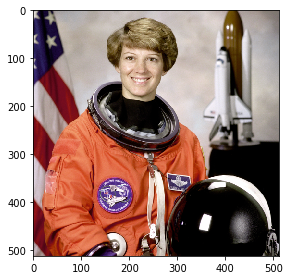

In [3]:
image = data.astronaut()
io.imshow(image)

In [4]:
type(image)

numpy.ndarray

In [5]:
image

array([[[154, 147, 151],
        [109, 103, 124],
        [ 63,  58, 102],
        ...,
        [127, 120, 115],
        [120, 117, 106],
        [125, 119, 110]],

       [[177, 171, 171],
        [144, 141, 143],
        [113, 114, 124],
        ...,
        [127, 118, 112],
        [124, 115, 108],
        [121, 116, 105]],

       [[201, 194, 193],
        [182, 178, 175],
        [168, 165, 164],
        ...,
        [128, 120, 117],
        [126, 116, 112],
        [124, 114, 109]],

       ...,

       [[186, 170, 176],
        [186, 170, 177],
        [183, 168, 170],
        ...,
        [  0,   0,   0],
        [  0,   0,   1],
        [  0,   0,   0]],

       [[183, 169, 170],
        [182, 167, 171],
        [185, 164, 176],
        ...,
        [  0,   0,   1],
        [  1,   1,   1],
        [  0,   0,   0]],

       [[184, 167, 172],
        [183, 165, 169],
        [180, 162, 171],
        ...,
        [  0,   0,   0],
        [  1,   1,   1],
        [  0,   0,   0]]

In [6]:
image.shape

(512, 512, 3)

In [9]:
face = image[0:200, 150:300]
face.shape

(200, 150, 3)

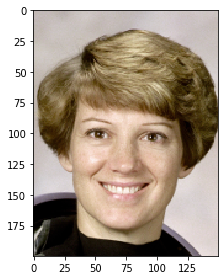

In [10]:
io.imshow(face)

In [11]:
face = image[0:200, 150:300, 0]
face.shape

(200, 150)

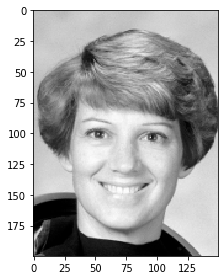

In [12]:
io.imshow(face)

In [17]:
eye = face[97:105, 49:59]
eye

array([[105, 102,  96, 106, 101, 103, 124, 137, 152, 156],
       [ 92,  75,  51,  57,  61,  63,  76,  90, 116, 147],
       [149,  80,  59,  71,  57,  41,  53,  79, 115, 135],
       [176,  81,  69, 146, 161,  42,  58, 100, 120, 187],
       [174,  83,  85, 116, 107,  35,  85, 186, 159, 207],
       [200,  96,  84,  72,  61,  62,  96, 134, 157, 234],
       [201, 149, 107, 103,  92,  98,  97, 118, 186, 224],
       [192, 186, 180, 183, 161, 142, 148, 167, 198, 197]], dtype=uint8)

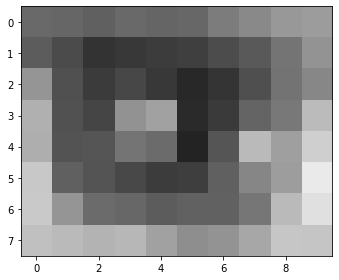

In [15]:
io.imshow(eye)

In [18]:
eye[0,0]

105

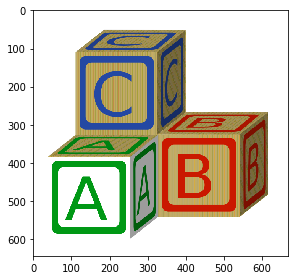

In [20]:
blocks = io.imread('/content/abc_blocks.png')
io.imshow(blocks)

In [21]:
blocks.ndim

3

In [22]:
blocks.shape

(644, 668, 3)

In [23]:
from skimage.color import rgb2gray
from skimage import transform

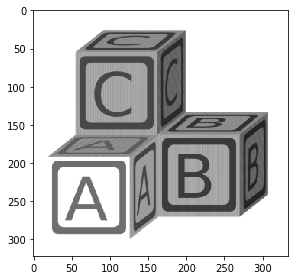

In [24]:
gray_block = transform.rescale(blocks, .5, multichannel=True)
gray_block = rgb2gray(gray_block)
io.imshow(gray_block)

In [25]:
io.imsave('gray_blocks.png', gray_block)

In [34]:
bf = io.imread('/content/bf_stack.tif')
bf.shape

(40, 442, 422)

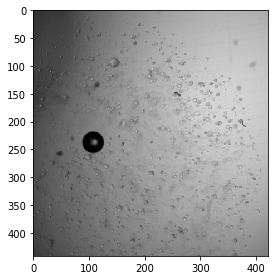

In [37]:
io.imshow(bf[0, :,:])

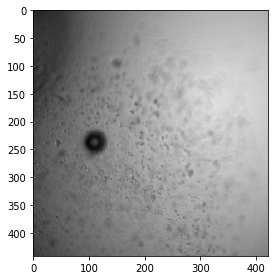

In [38]:
io.imshow(bf[35, :,:])

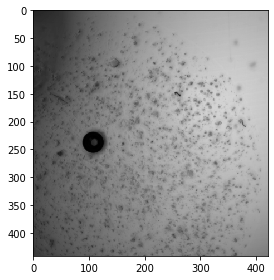

In [39]:
io.imshow(bf.min(axis = 0))

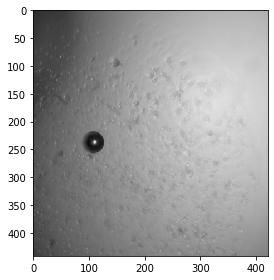

In [40]:
io.imshow(bf.max(axis = 0))

# **Image Filtering (Selection Element)**

In [41]:
from skimage import morphology
selem = morphology.square(3)
print(selem)

[[1 1 1]
 [1 1 1]
 [1 1 1]]


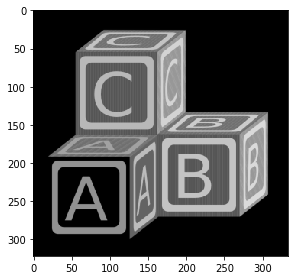

In [43]:
from skimage.util import img_as_ubyte, invert
blocks = invert(gray_block)
blocks = img_as_ubyte(blocks)

io.imshow(blocks)

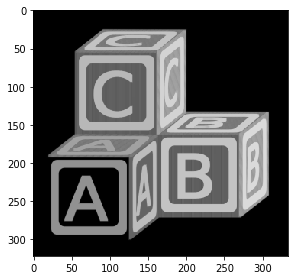

In [44]:
from skimage.filters import rank
blocks_max = rank.maximum(blocks, selem)
io.imshow(blocks_max)

**notice the border of A is slightly brighter
thats what u get for max rank filter

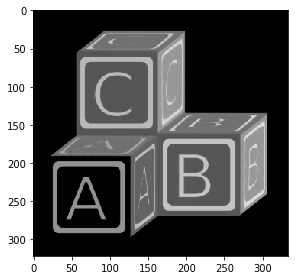

In [45]:
blocks_min = rank.minimum(blocks, selem)
io.imshow(blocks_min)

**notice the border of A is slightly darker and thinner
thats what u get for min rank filter

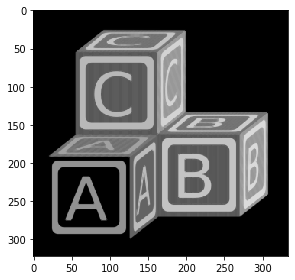

In [46]:
blocks_med = rank.median(blocks, selem)
io.imshow(blocks_med)

gets rid of the noise without changing the border

# Change the value of selector element

In [47]:
from skimage import morphology
selem2 = morphology.square(10)
print(selem2)

[[1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1]]


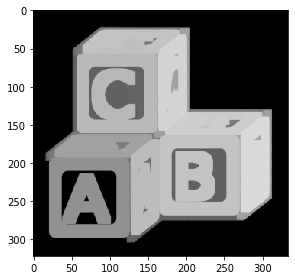

In [48]:
from skimage.filters import rank
blocks_max = rank.maximum(blocks, selem2)
io.imshow(blocks_max)

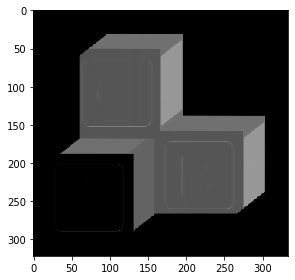

In [49]:
blocks_min = rank.minimum(blocks, selem2)
io.imshow(blocks_min)

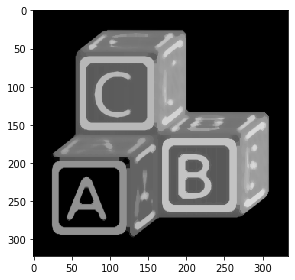

In [50]:
blocks_med = rank.median(blocks, selem2)
io.imshow(blocks_med)

# Edge Detection

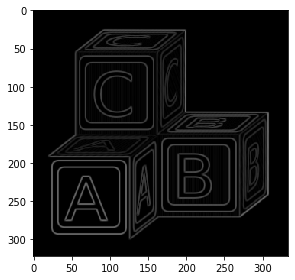

In [52]:
from skimage import filters
block_edge = filters.prewitt(blocks)
io.imshow(block_edge)

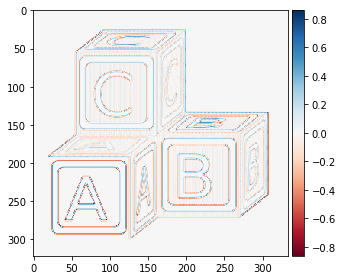

In [53]:
block_edge2 = filters.laplace(blocks)
io.imshow(block_edge2)

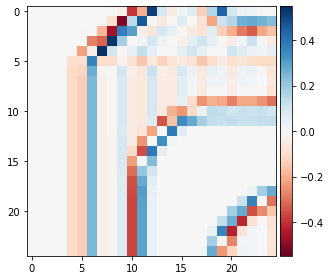

In [54]:
io.imshow(block_edge2[50:75, 50:75])

# Gaussian Filter

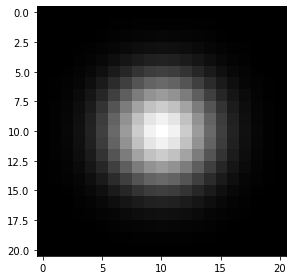

In [55]:
from scipy.signal import gaussian as gk
gaussian_2d = gk(21, 3)[:, None] * gk(21, 3)[None, :]
io.imshow(gaussian_2d)

# 2D Version of the Gaussian Kernel Image

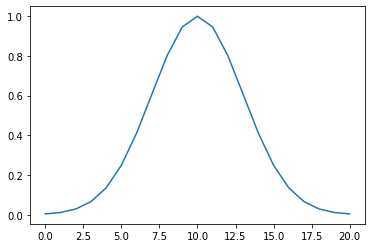

In [56]:
import matplotlib.pyplot as plt
plt.plot(gaussian_2d[:, 10])

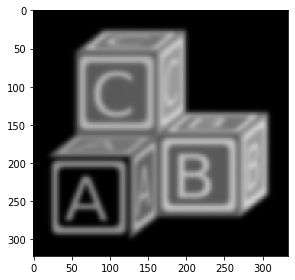

In [57]:
blocks_blur3 = filters.gaussian(blocks, sigma = 3)
io.imshow(blocks_blur3)

** Notice the image becomes blurry; try changing the sigma value

# **Image Thresholding**

set value manually

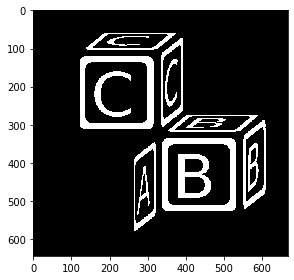

In [58]:
goblocks = io.imread('/content/abc_blocks.png')
goblocks = rgb2gray(goblocks)
goblocks = invert(goblocks)
goblocks_thresh = goblocks > 0.7

io.imshow(goblocks_thresh)

In [59]:
print(goblocks_thresh[88:92, 200:204])

[[ True  True  True  True]
 [False  True  True  True]
 [False False False False]
 [False False False False]]


False are considered to be background and white dedicate as foreground

Set threshold value automatically

skimage.filters.thresholding.threshold_isodata
skimage.filters.thresholding.threshold_li
skimage.filters.thresholding.threshold_mean
skimage.filters.thresholding.threshold_minimum
skimage.filters.thresholding.threshold_otsu
skimage.filters.thresholding.threshold_triangle
skimage.filters.thresholding.threshold_yen


(<Figure size 576x360 with 8 Axes>,
 array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f75e52823d0>,
       dtype=object))

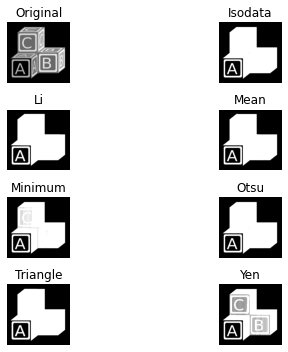

In [61]:
from skimage import filters
filters.try_all_threshold(goblocks)

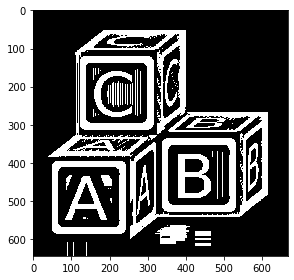

In [63]:
nib_thresh_val = filters.threshold_niblack(goblocks, 41, .001)
goblocks_nib = goblocks > nib_thresh_val
io.imshow(goblocks_nib)

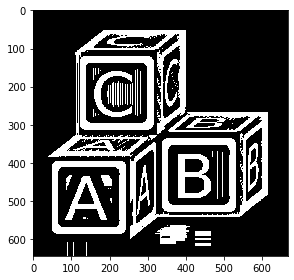

In [68]:
li_thresh_val = filters.threshold_niblack(goblocks, 41, .001)
goblocks_li = goblocks > li_thresh_val
letters = goblocks_li & goblocks_nib
io.imshow(letters)

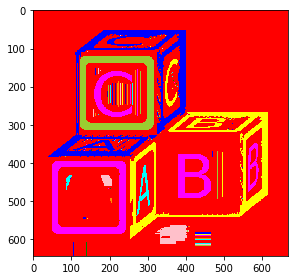

In [75]:
from skimage import measure
from skimage.color import label2rgb
letters_labels = measure.label(letters, connectivity = 1.3)
io.imshow(label2rgb(letters_labels))